# Simple Fashion-MNIST convnet

Largely taken from [MNIST](https://keras.io/examples/vision/mnist_convnet/)'s example by [fchollet](https://twitter.com/fchollet)<br>

## Setup

In [1]:
!pip install numpy

In [2]:
!pip install tensorflow

In [3]:
!pip install matplotlib

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


import matplotlib.pyplot as plt
plt.ion()

2024-05-19 15:58:31.750137: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-19 15:58:31.754219: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-19 15:58:31.813826: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 15:58:32.838773: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Prepare the data

In [5]:
id2class = {0: "T-shirt/top",
            1: "Trouser",
            2: "Pullover",
            3: "Dress",
            4: "Coat",
            5: "Sandal",
            6: "Shirt",
            7: "Sneaker",
            8: "Bag",
            9: "Ankle boot",}

In [8]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_test_inf, y_test_inf = x_test.copy(), y_test.copy()

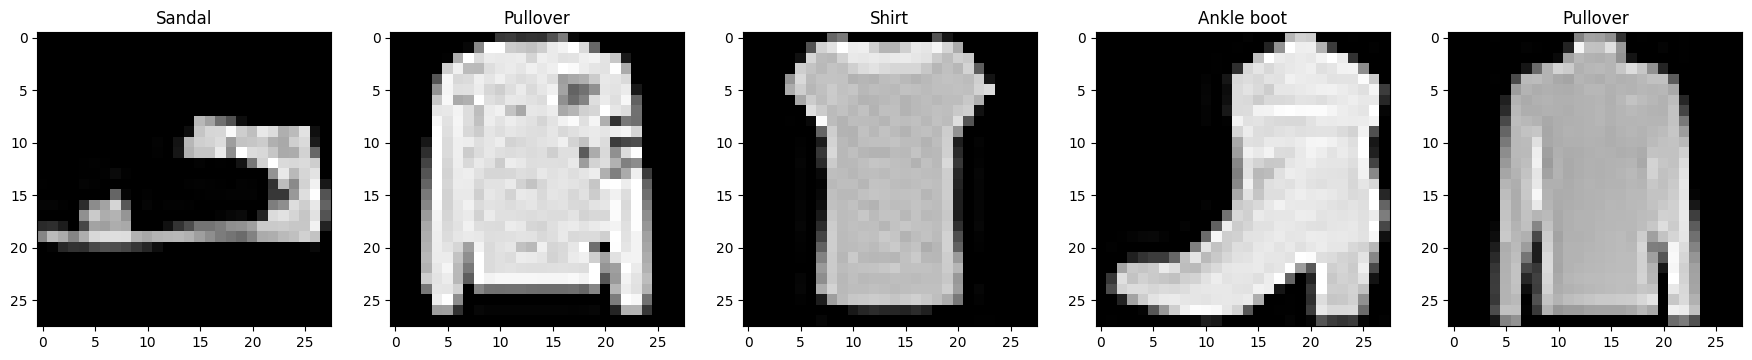

In [9]:
idx = np.random.randint(0, high=len(x_train), size=5)
figs, axes = plt.subplots(ncols=5, figsize=(22, 4))
for ax, i in zip(axes, idx): 
    ax.imshow(x_train[i], cmap='gray');
    ax.set_title(id2class[y_train[i]])

In [10]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [11]:

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        #layers.Conv2D(16, kernel_size=(1, 1), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [12]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/5


2024-05-19 15:59:09.811394: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.6418 - loss: 1.0223 - val_accuracy: 0.8425 - val_loss: 0.4397
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8310 - loss: 0.4615 - val_accuracy: 0.8570 - val_loss: 0.3876
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8498 - loss: 0.4198 - val_accuracy: 0.8710 - val_loss: 0.3528
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8634 - loss: 0.3810 - val_accuracy: 0.8812 - val_loss: 0.3271
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8704 - loss: 0.3599 - val_accuracy: 0.8867 - val_loss: 0.3170


## Evaluate the trained model

In [13]:

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.33738431334495544
Test accuracy: 0.8804000020027161


## Save model

In [14]:
model.save("fashion_mnist.h5")

In [15]:
model.save("fashion_mnist.keras")

## Inference

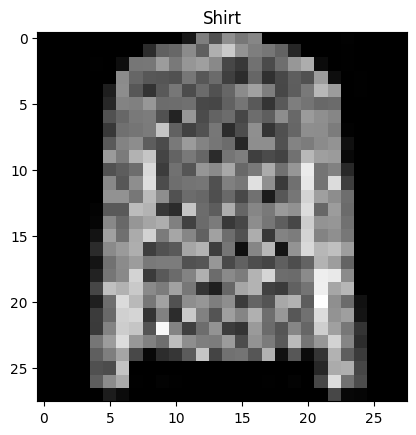

In [16]:
idx = 1004
im = x_test_inf[idx]
plt.imshow(im, cmap="gray")
plt.title(id2class[y_test_inf[idx]]);

In [17]:
im = im.astype("float32") / 255
im = np.expand_dims(im, -1)[None]
im.shape

(1, 28, 28, 1)

In [18]:
f"Predicted Class: {id2class[np.argmax(model.predict(im))]}"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


'Predicted Class: Shirt'

In [19]:
print(x_test_inf[idx].tolist())

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 126, 81, 142, 119, 133, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 44, 96, 103, 138, 95, 174, 201, 146, 126, 118, 99, 38, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 14, 118, 119, 155, 122, 149, 158, 136, 71, 57, 113, 75, 110, 150, 172, 11, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 138, 102, 87, 85, 82, 119, 87, 107, 63, 44, 102, 49, 72, 94, 81, 155, 14, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 30, 140, 87, 51, 90, 119, 76, 107, 82, 102, 138, 160, 126, 71, 93, 121, 183, 155, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 39, 130, 127, 150, 108, 109, 112, 72, 70, 98, 117, 89, 52, 90, 126, 116, 104, 107, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 82, 103, 122, 124, 81, 35, 150, 75, 99, 108, 70, 109, 94, 140, 104, 154, 142, 133, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 56, 112, 117, 123, 196, 98, 65, 82, 119, 44, 77, 142, 52, 80, 102, 141, 140, 124, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 89, 130, 140, 93, 75, 122, 154, 130, 118, 108, 38, 141, 141, 81, 131, 124, 138, 147, 16, 0, 0, 0, 0], 

For the below cell to work you must have a web app up-and-running and listening on port 5000

In [20]:
!pip install --upgrade flask
!pip install --upgrade flask


In [ ]:
from flask import Flask, request, jsonify
import numpy as np
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model("fashion_mnist.keras")

app = Flask(__name__)

# Define a route for predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the data from the request
        data = request.get_json()
        image = data['image']
        
        # Convert the image to a numpy array and reshape as necessary
        # Adjust the shape as per your model's input requirement
        image_array = np.array(image).reshape(1, 28, 28, 1)  # Example shape

        # Predict the class
        predictions = model.predict(image_array)
        predicted_class = np.argmax(predictions, axis=1)

        # Return the prediction as a JSON response
        return jsonify({'prediction': int(predicted_class[0])})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


/home/ubuntu/install-docker/monenv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.31.61.104:5000
INFO:werkzeug:Press CTRL+C to quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


INFO:werkzeug:54.196.41.2 - - [19/May/2024 16:02:45] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


INFO:werkzeug:54.196.41.2 - - [19/May/2024 16:02:53] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


INFO:werkzeug:54.196.41.2 - - [19/May/2024 16:03:09] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


INFO:werkzeug:54.196.41.2 - - [19/May/2024 16:04:02] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


INFO:werkzeug:54.196.41.2 - - [19/May/2024 16:04:15] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


INFO:werkzeug:54.196.41.2 - - [19/May/2024 16:04:24] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


INFO:werkzeug:54.196.41.2 - - [19/May/2024 16:04:36] "POST /predict HTTP/1.1" 200 -


In [ ]:
import requests
import json

im = x_test_inf[idx].tolist()
data = {'image': im}
URL = 'http://127.0.0.1:5000/predict'

result = requests.post(URL, json.dumps(data))
print(f"Prediction = {result.text}")